# Exploring features

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../dumps/2020.03.11-17.39.csv')
RED = "#f6546a"
GREEN = "#bada55"

## DLLs characteristics

        f0     f1     f2     f3     f4     f5     f6     f7    f30   f31  \
0.0  11809  14693  11994  14545  13128  14557  14702  10173  13903  9210   
1.0   2894     10   2709    158   1575    146      1   4530    800  5493   

       f32   f33    f34    f35    f41   f117  
0.0  12074  9802  11167  13643  14678   3265  
1.0   2629  4901   3536   1060     25  11438  


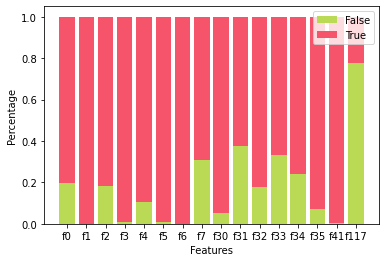

In [16]:
labels = ['f0','f1','f2','f3','f4','f5','f6','f7','f30','f31','f32','f33','f34','f35','f41','f117']
f = df[labels]
arr = f.apply(pd.Series.value_counts)
x_false = arr.iloc[0].tolist()
x_true = arr.iloc[1].tolist()
total = x_false[0] + x_true[0]
x_false = list(map(lambda x: x/total, x_false))
x_true = list(map(lambda x: x/total, x_true))
print(arr)
plt.bar(labels, x_true, color=GREEN, label="False")
plt.bar(labels, x_false, bottom=x_true, color=RED, label="True")
plt.xlabel("Features")
plt.ylabel("Percentage")
plt.legend()
plt.show()

In [139]:
test = df['f10'].groupby(['f10'])
print(test)

KeyError: 'f10'